# Кейс 2

В системе зарегистрирован сайт, время от времени он вливает в систему огромное количество трафика.    
2 файла:
1. Почасовая статистика трафика с сайта за 3 месяца.
2. Почасовая статистика по данной стране и платформе за 3 месяца.

Задачи:
1. Нужно оценить как резкое увеличения и количество трафика с сайта влияет на ключевые показатели rewenue/profit/paid.
2. Нужно определить влияние на показатели системы в момент поступления трафика с данного сайта.

Нужно предложить и обосновать рекомендации.
Возможная рекомендация: целесообразность покупки трафика с данного сайта;

## Предварительная обработка и ознакомление с данными

Загрузим последовательно все датасеты и ознакомимся с содержимым:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


1) Почасовая статистика трафика с сайта за 3 месяца

In [3]:
dataFromSite = pd.read_excel('Case 2 Hourly statistics for khaos.xls')
dataFromSite.Hour = dataFromSite.Hour.apply(pd.to_datetime)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


Посмотрим первые 5 строк:

In [4]:
dataFromSite.head()

,Hour,Requests,Impressions,Clicks,Conversions,Revenue,Payed,Profit,ROI,Conv/Imps,CPM,CPM_P,CTR
0,2016-05-10 00:00:00,0,0,0,0,5.83,0.00,5.83,100.00,0.00,0.00,0.00,0
1,2016-05-10 10:00:00,3089,2046,0,0,2.41,1.17,1.24,51.54,0.00,1.18,0.57,0
2,2016-05-10 11:00:00,6705,4540,0,1,3.62,2.72,0.90,24.83,0.02,0.80,0.60,0
3,2016-05-10 12:00:00,145,120,0,0,0.09,0.07,0.02,23.17,0.00,0.78,0.60,0
4,2016-05-10 18:00:00,19,10,0,0,0.00,0.01,0.00,-98.02,0.00,0.30,0.60,0


Количество строк (почасовых измерений) и количество столбцов (параметров измерений) в загруженном датасете:

In [5]:
dataFromSite.shape

(1474, 13)

Общая сводка по датасету:

In [6]:
dataFromSite.describe()

,Requests,Impressions,Clicks,Conversions,Revenue,Payed,Profit,ROI,Conv/Imps,CPM,CPM_P,CTR
count,1.474000e+03,1.474000e+03,1474.0,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.0
mean,7.994891e+04,6.151287e+04,0.0,16.424016,28.708609,21.103955,7.604579,-58.570455,0.062056,1.318806,0.360529,0.0
std,1.998466e+05,1.439498e+05,0.0,28.059848,71.161384,40.096946,57.975391,310.882479,0.340243,21.897416,0.141051,0.0
min,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,-294.510000,-6590.110000,0.000000,0.000000,0.000000,0.0
25%,1.437475e+04,1.144175e+04,0.0,3.000000,3.620000,3.560000,-3.587500,-68.107500,0.010000,0.170000,0.250000,0.0
50%,3.474500e+04,2.733450e+04,0.0,8.000000,9.940000,9.710000,0.410000,8.875000,0.030000,0.400000,0.350000,0.0
75%,7.820450e+04,6.264100e+04,0.0,18.000000,25.820000,21.912500,6.817500,45.770000,0.050000,0.730000,0.460000,0.0
max,4.046949e+06,2.965360e+06,0.0,421.000000,1144.090000,678.740000,901.920000,100.000000,11.660000,835.920000,0.600000,0.0


Период измерений:

In [7]:
print u'Период с {} до {}'.format(dataFromSite.Hour.min(), dataFromSite.Hour.max())

Период с 2016-05-10 00:00:00 до 2016-07-10 23:00:00


2) Почасовая статистика по данной стране и платформе за 3 месяца

In [8]:
dataFromSlice = pd.read_excel('Case 2 Hourly statistics for slice.xls')
dataFromSlice.Hour = dataFromSlice.Hour.apply(pd.to_datetime)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


Посмотрим первые 5 строк:

In [9]:
dataFromSlice.head()

,Hour,Requests,Impressions,Clicks,Conversions,Revenue,Payed,Profit,ROI,Conv/Imps,CPM,CPM_P,CTR
0,2016-03-01 00:00:00,374182,264839,0,84,412.65,184.84,227.81,55.21,0.03,1.56,0.70,0
1,2016-03-01 01:00:00,384700,277047,0,113,158.13,116.82,41.31,26.12,0.04,0.57,0.42,0
2,2016-03-01 02:00:00,401481,286007,0,87,142.36,105.00,37.36,26.24,0.03,0.50,0.37,0
3,2016-03-01 03:00:00,246760,212149,0,98,124.94,84.62,40.32,32.27,0.05,0.59,0.40,0
4,2016-03-01 04:00:00,364235,259339,0,79,109.87,91.24,18.64,16.96,0.03,0.42,0.35,0


Количество строк (почасовых измерений) и количество столбцов (параметров измерений) в загруженном датасете:

In [10]:
dataFromSlice.shape

(3168, 13)

In [11]:
dataFromSlice.describe()

,Requests,Impressions,Clicks,Conversions,Revenue,Payed,Profit,ROI,Conv/Imps,CPM,CPM_P,CTR
count,3.168000e+03,3.168000e+03,3168.0,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.0
mean,3.571911e+05,2.982090e+05,0.0,94.791667,228.928497,115.457929,113.470328,38.747402,0.031963,0.761919,0.388699,0.0
std,1.838837e+05,1.422349e+05,0.0,331.530899,222.609623,56.175383,183.697487,20.515914,0.071174,0.677669,0.102846,0.0
min,2.745500e+04,2.184700e+04,0.0,8.000000,27.560000,9.730000,-278.050000,-177.940000,0.000000,0.100000,0.210000,0.0
25%,2.566888e+05,2.129610e+05,0.0,58.000000,120.742500,77.112500,33.932500,27.647500,0.020000,0.490000,0.340000,0.0
50%,3.099430e+05,2.609555e+05,0.0,78.000000,156.790000,96.520000,62.000000,40.320000,0.030000,0.620000,0.380000,0.0
75%,3.964715e+05,3.302922e+05,0.0,105.000000,246.255000,132.922500,125.447500,53.040000,0.040000,0.830000,0.410000,0.0
max,4.288771e+06,3.143135e+06,0.0,15331.000000,2723.450000,741.720000,2351.540000,89.320000,3.120000,8.180000,1.610000,0.0


Период измерений:

In [12]:
print u'Период с {} до {}'.format(dataFromSlice.Hour.min(), dataFromSlice.Hour.max())

Период с 2016-03-01 00:00:00 до 2016-07-10 23:00:00


## Визуализация данных

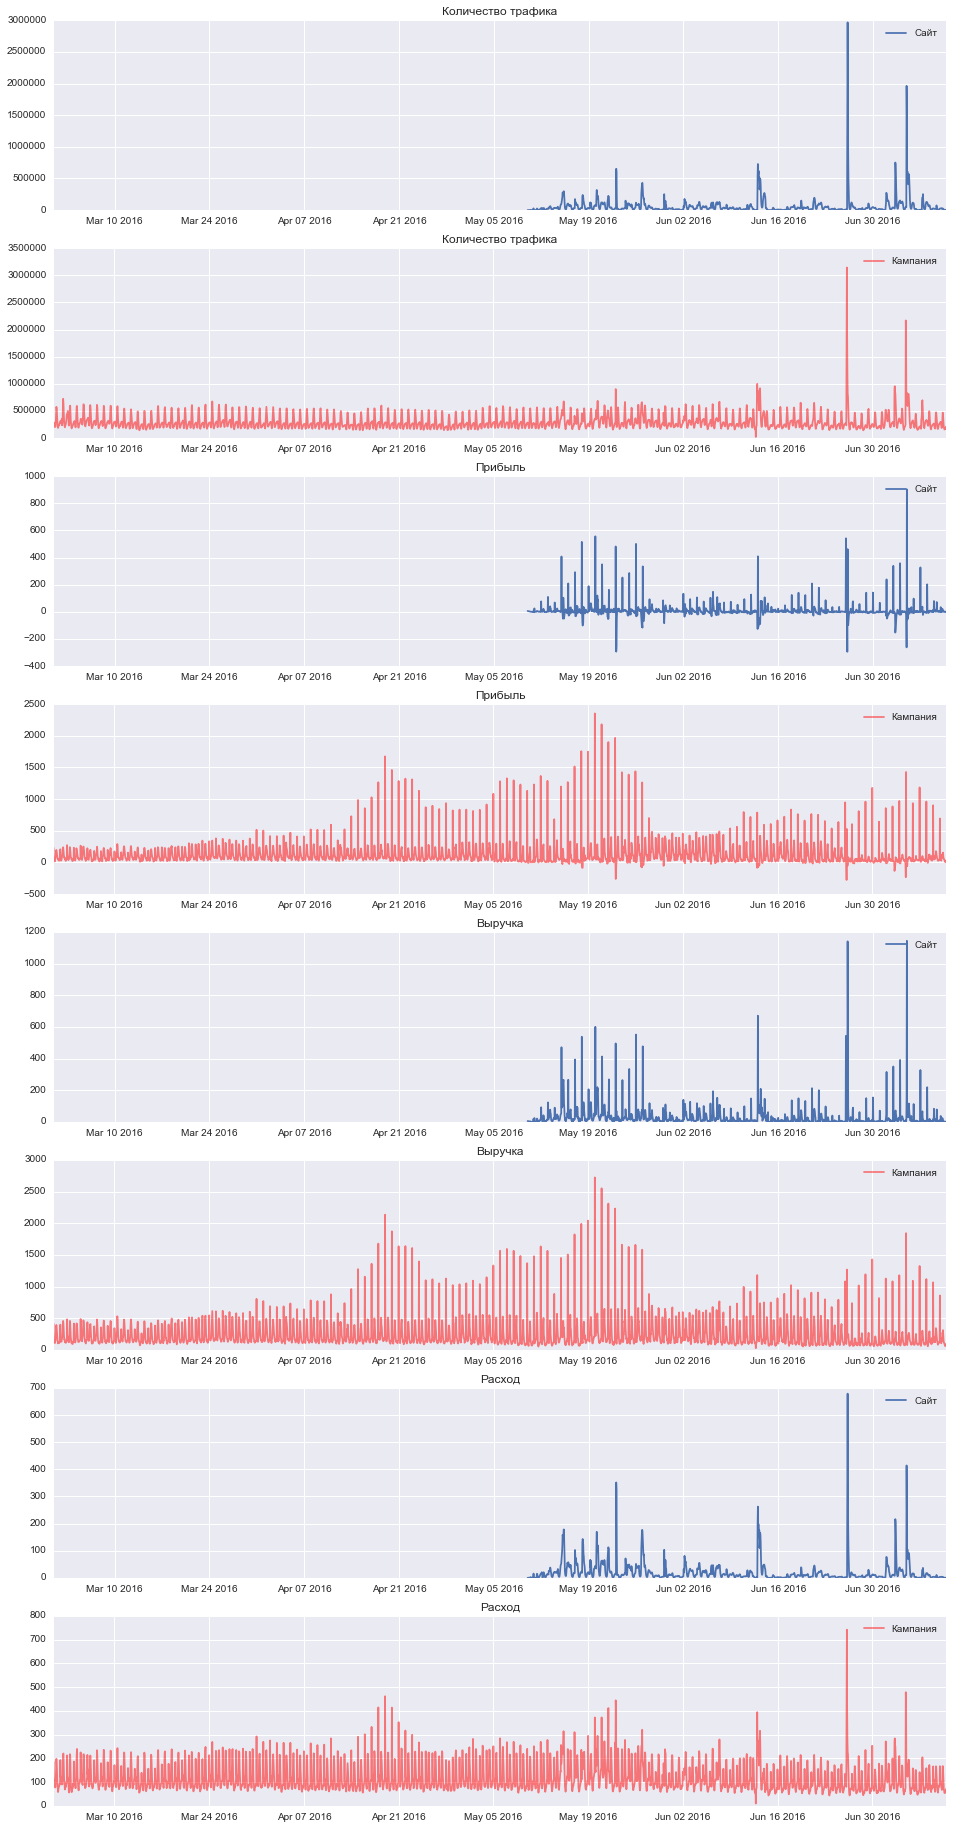

In [13]:
pylab.figure(figsize=(16, 32))

pylab.subplot(8,1,1)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Impressions.values, label=u"Сайт")
pylab.legend()
pylab.title(u'Количество трафика')
pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-07-10T23:00:00.000000000+0300')

pylab.subplot(8,1,2)
pylab.grid(True)
pylab.plot(dataFromSlice.Hour.values, dataFromSlice.Impressions.values, label=u"Кампания", color='red', alpha=0.5)
pylab.legend()
pylab.title(u'Количество трафика')

pylab.subplot(8,1,3)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Profit.values, label=u"Сайт")
pylab.legend()
pylab.title(u'Прибыль')
pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-07-10T23:00:00.000000000+0300')

pylab.subplot(8,1,4)
pylab.grid(True)
pylab.plot(dataFromSlice.Hour.values, dataFromSlice.Profit.values, label=u"Кампания", color='red', alpha=0.5)
pylab.legend()
pylab.title(u'Прибыль')

pylab.subplot(8,1,5)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Revenue.values, label=u"Сайт")
pylab.legend()
pylab.title(u'Выручка')
pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-07-10T23:00:00.000000000+0300')

pylab.subplot(8,1,6)
pylab.grid(True)
pylab.plot(dataFromSlice.Hour.values, dataFromSlice.Revenue.values, label=u"Кампания", color='red', alpha=0.5)
pylab.legend()
pylab.title(u'Выручка')

pylab.subplot(8,1,7)
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Payed.values, label=u"Сайт")
pylab.legend()
pylab.title(u'Расход')
pylab.xlim('2016-03-01T03:00:00.000000000+0300', '2016-07-10T23:00:00.000000000+0300')

pylab.subplot(8,1,8)
pylab.grid(True)
pylab.plot(dataFromSlice.Hour.values, dataFromSlice.Payed.values, label=u"Кампания", color='red', alpha=0.5)
pylab.legend()
pylab.title(u'Расход')

В графике Количество трафика vs Прибыль для сайта рассмотрим подробнее несколько периодов:

* Период с 14 мая по 24 мая:

(736098.0, 736108.8333333334)

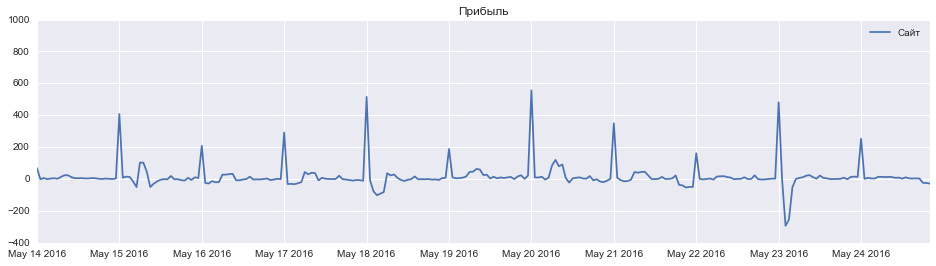

In [14]:
pylab.figure(figsize=(16, 4))
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Profit.values, label=u"Сайт")
pylab.legend()
pylab.title(u'Прибыль')
pylab.xlim('2016-05-14T03:00:00.000000000+0300', '2016-05-24T23:00:00.000000000+0300')

* Период с 10 июня по 20 июня:

(736125.0, 736135.8333333334)

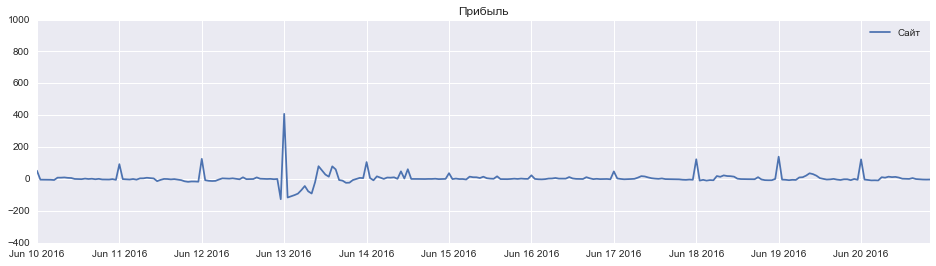

In [15]:
pylab.figure(figsize=(16, 4))
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Profit.values, label=u"Сайт")
pylab.legend()
pylab.title(u'Прибыль')
pylab.xlim('2016-06-10T03:00:00.000000000+0300', '2016-06-20T23:00:00.000000000+0300')

* Период с 25 июня по 5 июля:

(736140.0, 736150.8333333334)

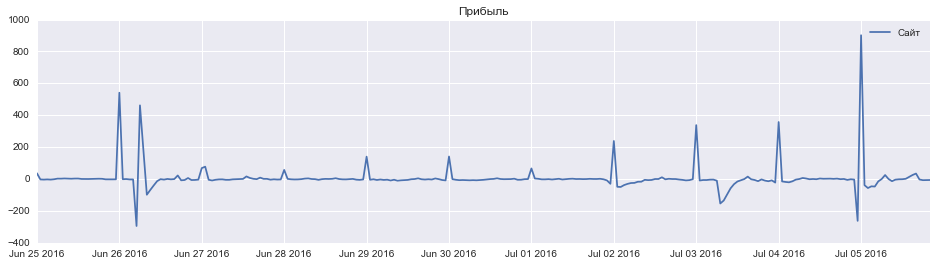

In [16]:
pylab.figure(figsize=(16, 4))
pylab.grid(True)
pylab.plot(dataFromSite.Hour.values, dataFromSite.Profit.values, label=u"Сайт")
pylab.legend()
pylab.title(u'Прибыль')
pylab.xlim('2016-06-25T03:00:00.000000000+0300', '2016-07-05T23:00:00.000000000+0300')

#### Выводы из графиков:

1) Трафик с сайта приносит прибыль только в период с 12.00 до 00.00.     
2) В праздничные дни трафик с сайта прибыли не приносит.

## Оценка влияния количества трафика сайта на ключевые показатели

In [17]:
X_Impressions = dataFromSite['Impressions']
y_Profit = dataFromSite[['Profit']]
y_Revenue = dataFromSite[['Revenue']]
y_Payed = dataFromSite[['Payed']]

In [18]:
X_Impressions = X_Impressions.reshape((len(X_Impressions), 1))

In [19]:
regr = LinearRegression()

regr.fit(X_Impressions, y_Profit)
ProfitCoef = regr.coef_[0][0]
ProfitIntercept = regr.intercept_[0]

regr.fit(X_Impressions, y_Revenue)
RevenueCoef = regr.coef_[0][0]
RevenueIntercept = regr.intercept_[0]

regr.fit(X_Impressions, y_Payed)
PayedCoef = regr.coef_[0][0]
PayedIntercept = regr.intercept_[0]

print ""
print 'Зависимость выгоды (Profit) от объема трафика (Impressions):'
print "Profit = {:} + {:}*Impressions".format(ProfitIntercept, ProfitCoef)
print ""
print 'Зависимость выручки (Revenue) от объема трафика (Impressions):'
print "Revenue = {:} + {:}*Impressions".format(RevenueIntercept, RevenueCoef)
print ""
print 'Зависимость расходов (Payed) от объема трафика (Impressions)'
print "Payed = {:} + {:}*Impressions".format(PayedIntercept, PayedCoef)


Зависимость выгоды (Profit) от объема трафика (Impressions):
Profit = 5.3739265281 + 3.62631874286e-05*Impressions

Зависимость выручки (Revenue) от объема трафика (Impressions):
Revenue = 10.8201073522 + 0.000290809077236*Impressions

Зависимость расходов (Payed) от объема трафика (Impressions)
Payed = 5.4460956348 + 0.000254546061519*Impressions


Построим соответсвующие графики:

(0, 3000000)

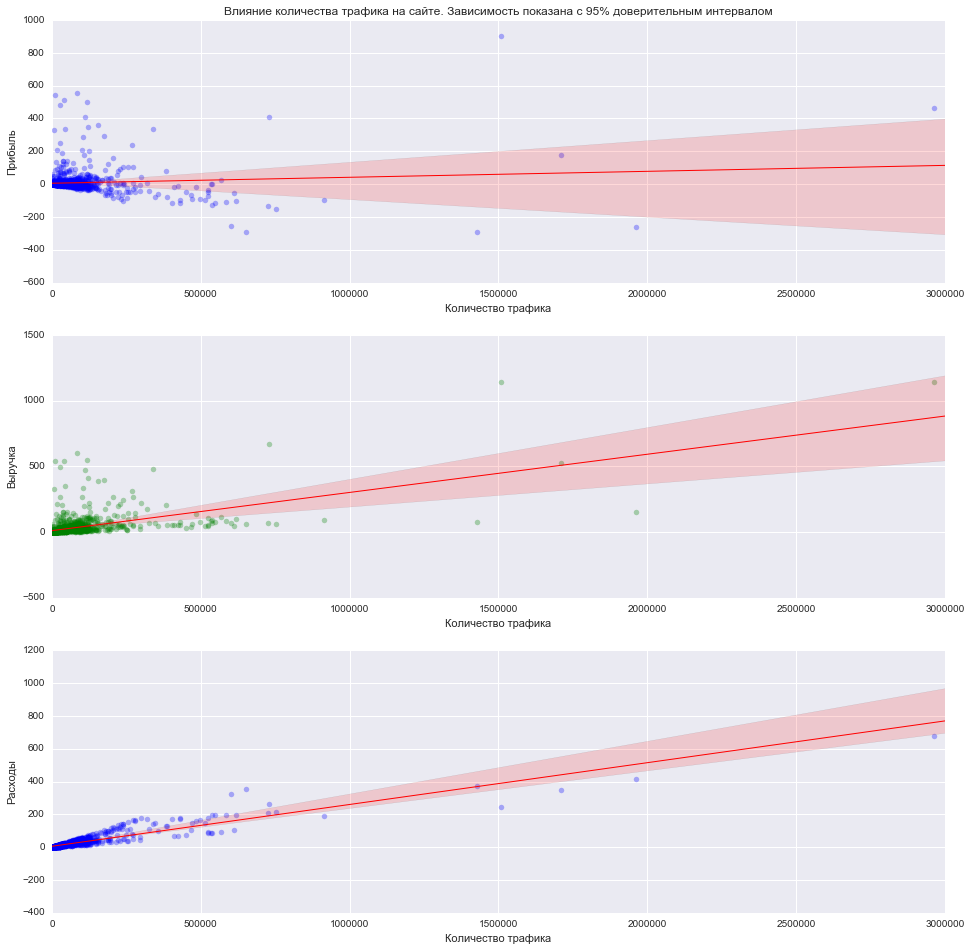

In [20]:
pylab.figure(figsize=(16, 16))

pylab.subplot(3,1,1)
plt.grid(True)
sns.regplot('Impressions', 'Profit', 
           data=dataFromSite, 
           fit_reg=True,
           ci = 95,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"blue","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Прибыль')
plt.title(u'Влияние количества трафика на сайте. Зависимость показана с 95% доверительным интервалом')
plt.xlim(0, 3000000)

pylab.subplot(3,1,2)
plt.grid(True)
sns.regplot('Impressions', 'Revenue', 
           data=dataFromSite, 
           fit_reg=True,
           ci = 95,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"green","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Выручка')
plt.xlim(0, 3000000)

pylab.subplot(3,1,3)
plt.grid(True)
sns.regplot('Impressions', 'Payed', 
           data=dataFromSite, 
           fit_reg=True,
           ci = 99,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"blue","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Расходы')
plt.xlim(0, 3000000)

## Влияние на показатели системы в момент поступления трафика с данного сайта

In [21]:
dataFromSliceFromSite = dataFromSlice[dataFromSlice['Hour'] >= '2016-05-10T03:00:00.000000000+0300']

In [22]:
X_Impressions = dataFromSliceFromSite['Impressions']
y_Profit = dataFromSliceFromSite[['Profit']]
y_Revenue = dataFromSliceFromSite[['Revenue']]
y_Payed = dataFromSliceFromSite[['Payed']]

In [23]:
X_Impressions = X_Impressions.reshape((len(X_Impressions), 1))

In [24]:
regr = LinearRegression()

regr.fit(X_Impressions, y_Profit)
ProfitCoef = regr.coef_[0][0]
ProfitIntercept = regr.intercept_[0]

regr.fit(X_Impressions, y_Revenue)
RevenueCoef = regr.coef_[0][0]
RevenueIntercept = regr.intercept_[0]

regr.fit(X_Impressions, y_Payed)
PayedCoef = regr.coef_[0][0]
PayedIntercept = regr.intercept_[0]

print ""
print 'Зависимость выгоды (Profit) от объема трафика (Impressions):'
print "Profit = {:} + {:}*Impressions".format(ProfitIntercept, ProfitCoef)
print ""
print 'Зависимость выручки (Revenue) от объема трафика (Impressions):'
print "Revenue = {:} + {:}*Impressions".format(RevenueIntercept, RevenueCoef)
print ""
print 'Зависимость расходов (Payed) от объема трафика (Impressions)'
print "Payed = {:} + {:}*Impressions".format(PayedIntercept, PayedCoef)


Зависимость выгоды (Profit) от объема трафика (Impressions):
Profit = 38.6027075995 + 0.000234926765177*Impressions

Зависимость выручки (Revenue) от объема трафика (Impressions):
Revenue = 58.5232360104 + 0.000535808607824*Impressions

Зависимость расходов (Payed) от объема трафика (Impressions)
Payed = 19.9201228271 + 0.000300882384136*Impressions


Построим соответсвующие графики:

(0, 3000000)

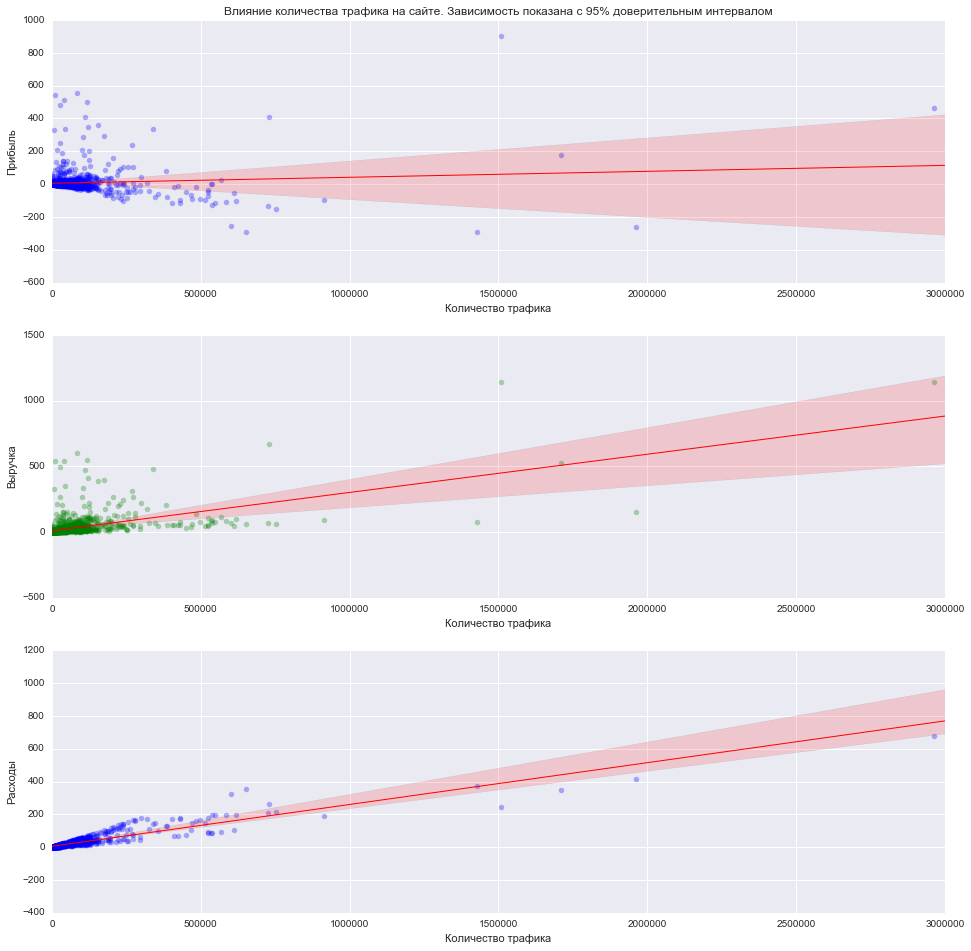

In [25]:
pylab.figure(figsize=(16, 16))

pylab.subplot(3,1,1)
plt.grid(True)
sns.regplot('Impressions', 'Profit', 
           data=dataFromSite, 
           fit_reg=True,
           ci = 95,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"blue","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Прибыль')
plt.title(u'Влияние количества трафика на сайте. Зависимость показана с 95% доверительным интервалом')
plt.xlim(0, 3000000)

pylab.subplot(3,1,2)
plt.grid(True)
sns.regplot('Impressions', 'Revenue', 
           data=dataFromSite, 
           fit_reg=True,
           ci = 95,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"green","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Выручка')
plt.xlim(0, 3000000)

pylab.subplot(3,1,3)
plt.grid(True)
sns.regplot('Impressions', 'Payed', 
           data=dataFromSite, 
           fit_reg=True,
           ci = 99,
           line_kws={'color': 'red', "alpha":1,"lw":1},
           scatter_kws={"color":"blue","alpha":0.3,"s":30})
plt.xlabel(u'Количество трафика')
plt.ylabel(u'Расходы')
plt.xlim(0, 3000000)

# Общие выводы и рекомендации

1) Зависимость выгоды (Profit) от количества трафика (Impressions):    
Кампания: Profit = 38.6027075995 + 0.000234926765177*Impressions    
Сайт: Profit = 5.3739265281 + 3.62631874286e-05*Impressions  
2) Зависимость для выручки (Revenue) и расходов (Payed) от количества трафика см. выше.    
3) С ростом количества трафика растут все ключевые показатели.    
4) Грубую интервальную оценку ожидаемых значений ключевых показателей для конкретного количества трафика (95% доверительный интервал) можно получить из графиков выше.    

Общая резолюция: покупка трафика с данного сайта целесообразна. Отмечу, что при планировании покупки больших объемов трафика (более 100 000) рекомендуется более точно рассчитать интервальную оценку прогнозируемой прибыли.